# Progressive tax and wage inflation

This plot is created to see how Australia's tax brackets have moved through time as they are adjusted for inflation.

This movement is seen nicely in ridgeline/waterfall/joyplot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
# read in existing sheets
dollars = pd.read_csv('dollars.csv', header=None)
rates = pd.read_csv('rates.csv', header=None)

print(dollars.head())
print(rates.head())

year_labels = dollars.iloc[:, 0].tolist() # vs to_list?
# get rid of first column containing years
d = dollars.iloc[:, 1:]
r = rates.iloc[:, 1:]

         0  1      2      3      4      5       6       7       8       9
0  2022-23  0  18200  18201  45000  45001  120000  120001  180000  180001
1  2021-22  0  18200  18201  45000  45001  120000  120001  180000  180001
2  2020-21  0  18200  18201  45000  45001  120000  120001  180000  180001
3  2019-20  0  18200  18201  37000  37001   90000   90001  180000  180001
4  2018-19  0  18200  18201  37000  37001   90000   90001  180000  180001
         0  1  2     3     4      5      6     7     8     9
0  2022-23  0  0  0.19  0.19  0.325  0.325  0.37  0.37  0.45
1  2021-22  0  0  0.19  0.19  0.325  0.325  0.37  0.37  0.45
2  2020-21  0  0  0.19  0.19  0.325  0.325  0.37  0.37  0.45
3  2019-20  0  0  0.19  0.19  0.325  0.325  0.37  0.37  0.45
4  2018-19  0  0  0.19  0.19  0.325  0.325  0.37  0.37  0.45


In [8]:
# use this code to add a new year manually

dollars_2023 = pd.DataFrame([['2022-23', 0, 18200, 18201, 45000, 45001, 120000, 120001, 180000, 180001]])
dollars_2023 = dollars_2023.append(dollars, ignore_index=True)
# dollars_2023.to_csv('dollars_updated.csv', index=False, header=False)

rates_2023 = pd.DataFrame([['2022-23', 0, 0, 0.19, 0.19, 0.325, 0.325, 0.37, 0.37, 0.45]])
rates_2023 = rates_2023.append(rates, ignore_index=True)
# rates_2023.to_csv('rates_updated.csv', index=False, header=False)

[Text(0, 0.0, '2022-23'), Text(0, 2.8000000000000003, '1994-95')]

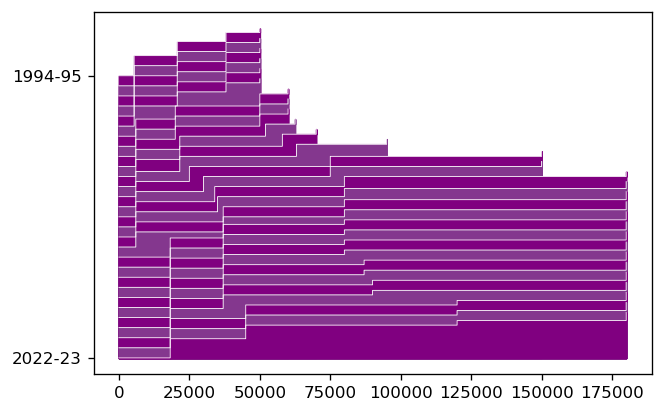

In [79]:
fig, ax = plt.subplots(dpi=120)

mypurple = "#84378e"
COLOR = "w"
RIDGE_SPACING = 0.1
NUM_POINTS = d.shape[1] # n cols
NUM_OBS = d.shape[0] # n rows

for ridge_num, year in enumerate(zip(d.values, r.values)):
    dollar_row = year[0]
    rate_row = year[1]
    shifted_array = [RIDGE_SPACING*ridge_num]*NUM_POINTS

    ax.plot(dollar_row,
            rate_row + shifted_array,
            color=COLOR,
            linewidth=0.5
            )

    ax.fill_between(x=dollar_row,
                    y1=rate_row + shifted_array,
                    zorder=-ridge_num,
                    color="purple" if (ridge_num % 2 == 0) else mypurple
                    )


latest_year = year_labels[0]
earliest_year = year_labels[-1]

ax.set_yticks(ticks=[0, (NUM_OBS - 1)*RIDGE_SPACING])
ax.set_yticklabels(labels=[latest_year, earliest_year])